In [11]:
import csv
import matplotlib.pyplot as plt
filename = 'sitka_weather_07-2014.csv'


## 创建一个与该文件相关联的阅读器（reader ） 对象

**模块csv 包含函数next() ， 调用它并将阅读器对象传递给它时， 它将返回文件中的下一行。**

In [16]:
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    highs = []
    for row in reader:
        # 使用int() 将这些字符串转换为数字， 让matplotlib能够读取它们：
        highs.append(int(row[1]))

# print(highs)

for i,d in enumerate(highs):
    print(i,d)


0 64
1 71
2 64
3 59
4 69
5 62
6 61
7 55
8 57
9 61
10 57
11 59
12 57
13 61
14 64
15 61
16 59
17 63
18 60
19 57
20 69
21 63
22 62
23 59
24 57
25 57
26 61
27 59
28 61
29 61
30 66


**header_row 包含与天气相关的文件头， 指出了每行都包含哪些数据**

**对列表调用了enumerate()来获取每个元素的索引及其值**

enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。

```
>>>seasons = ['Spring', 'Summer', 'Fall', 'Winter']
>>> list(enumerate(seasons))
[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
>>> list(enumerate(seasons, start=1))       # 下标从 1 开始
[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]
```

In [13]:
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)

- num:图像编号或名称，数字为编号 ，字符串为名称
- figsize:指定figure的宽和高，单位为英寸；
- dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
- facecolor:背景颜色
- edgecolor:边框颜色
- frameon:是否显示边框

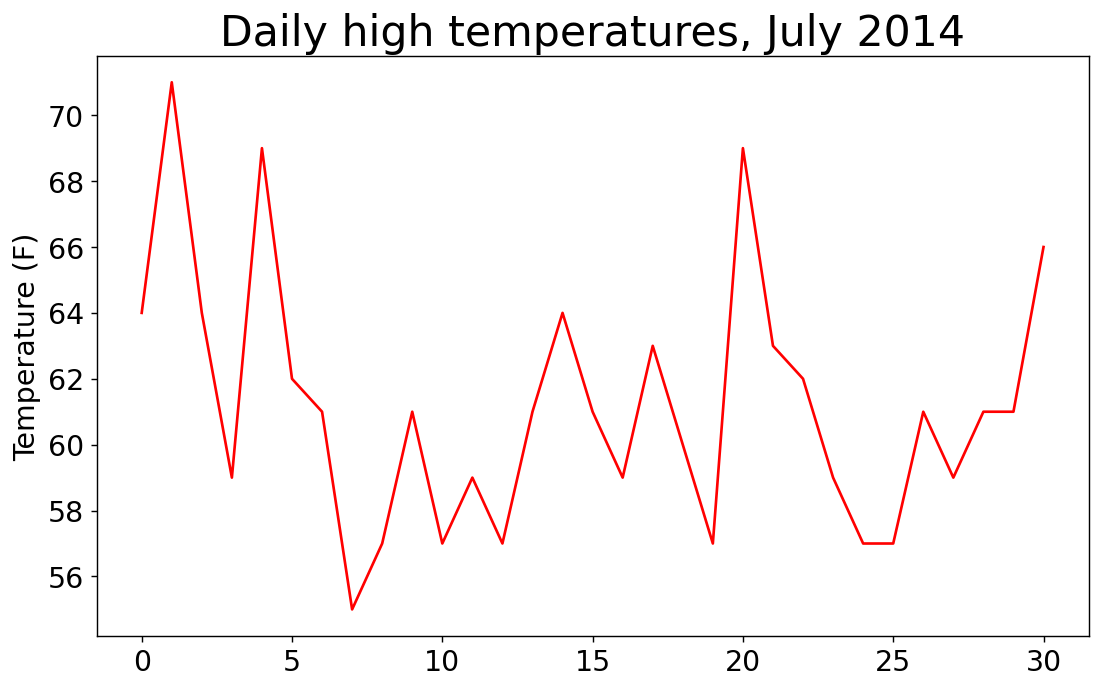

In [18]:
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

plt.show()

## 在图表中添加日期

**调用了fig.autofmt_xdate() 来绘制斜的日期标签， 以免它们彼此重叠**

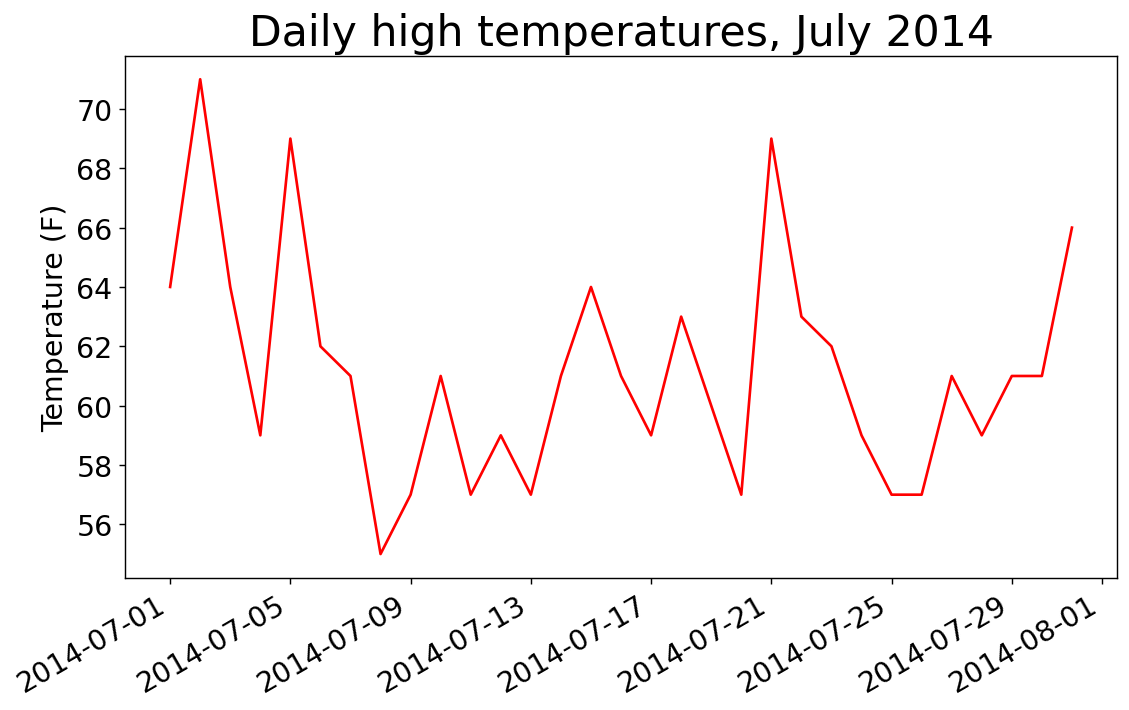

In [20]:
from datetime import datetime

# 从文件中获取日期和最高气温
filename = 'sitka_weather_07-2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
        
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## 涵盖更长的时间

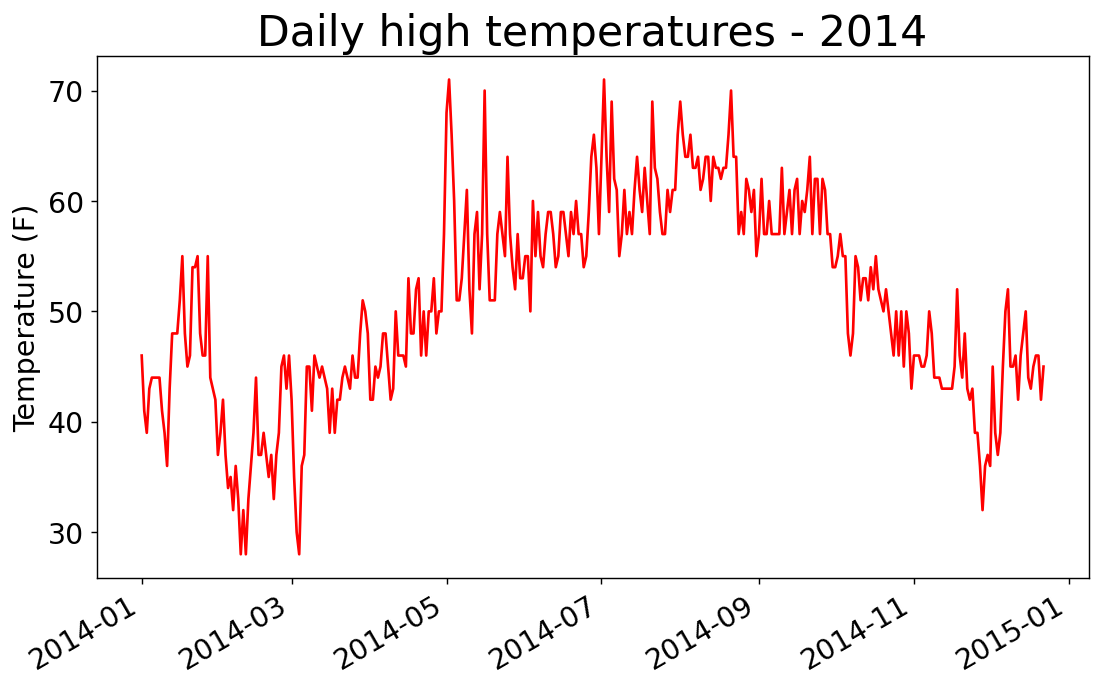

In [21]:
# 从文件中获取日期和最高气温
filename = 'sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
        
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## 再添加最低气温数据

Text(0.5, 1.0, 'Daily high and low temperatures - 2014')

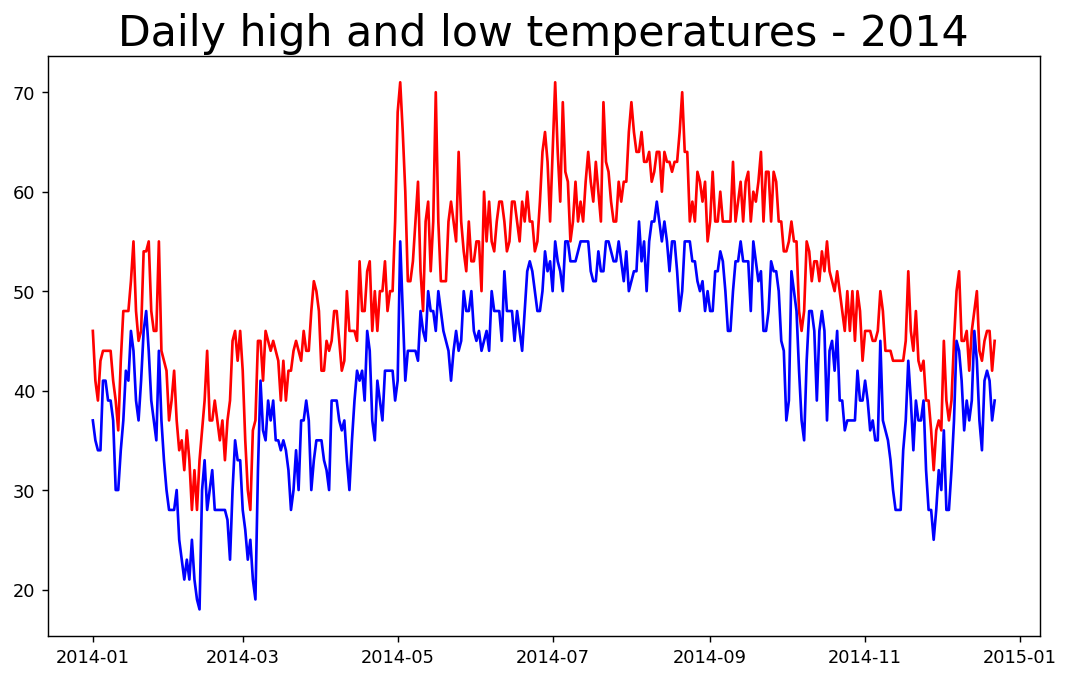

In [22]:
# 从文件中获取日期、 最高气温和最低气温
filename = 'sitka_weather_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []

    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)

        high = int(row[1])
        highs.append(high)
        low = int(row[3])
        lows.append(low)

# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')

# 设置图形的格式
plt.title("Daily high and low temperatures - 2014", fontsize=24)


## 通过着色来呈现每天的气温范围

**方法fill_between() ， 它接受一个 x 值系列和两个 y 值系列， 并填充两个 y 值系列之间的空间**

Text(0.5, 1.0, 'Daily high and low temperatures - 2014')

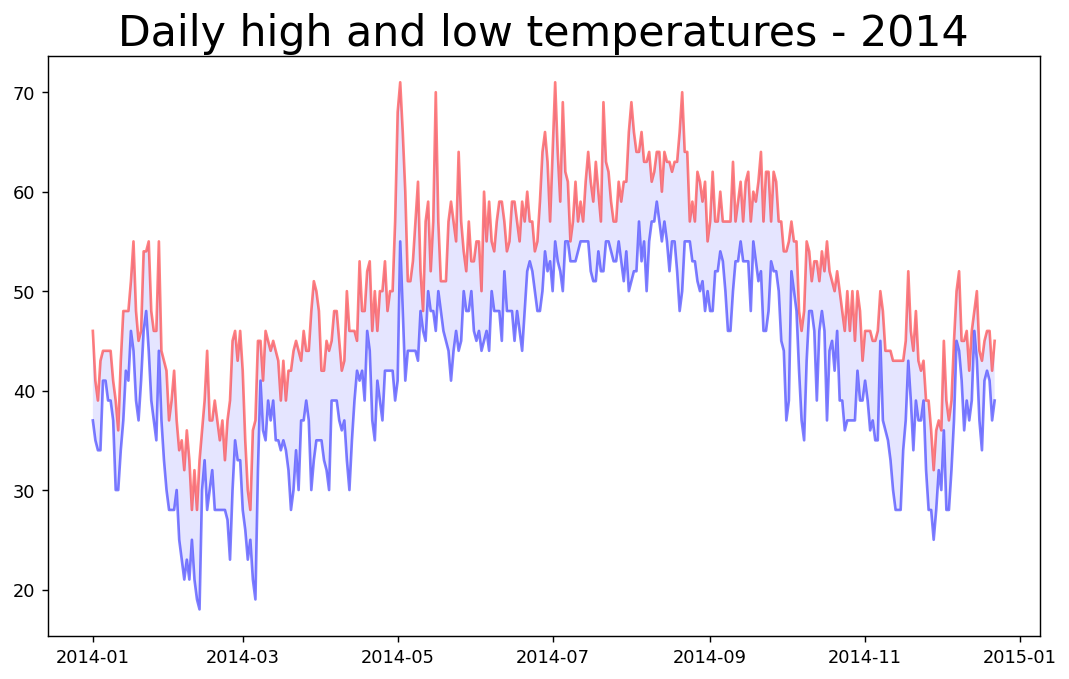

In [23]:
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 设置图形的格式
plt.title("Daily high and low temperatures - 2014", fontsize=24)

## 错误检查

**ValueError: invalid literal for int() with base 10: ''**

2014-02-16 00:00:00 missing data


Text(0.5, 1.0, 'Daily high and low temperatures - 2014\nDeath Valley, CA')

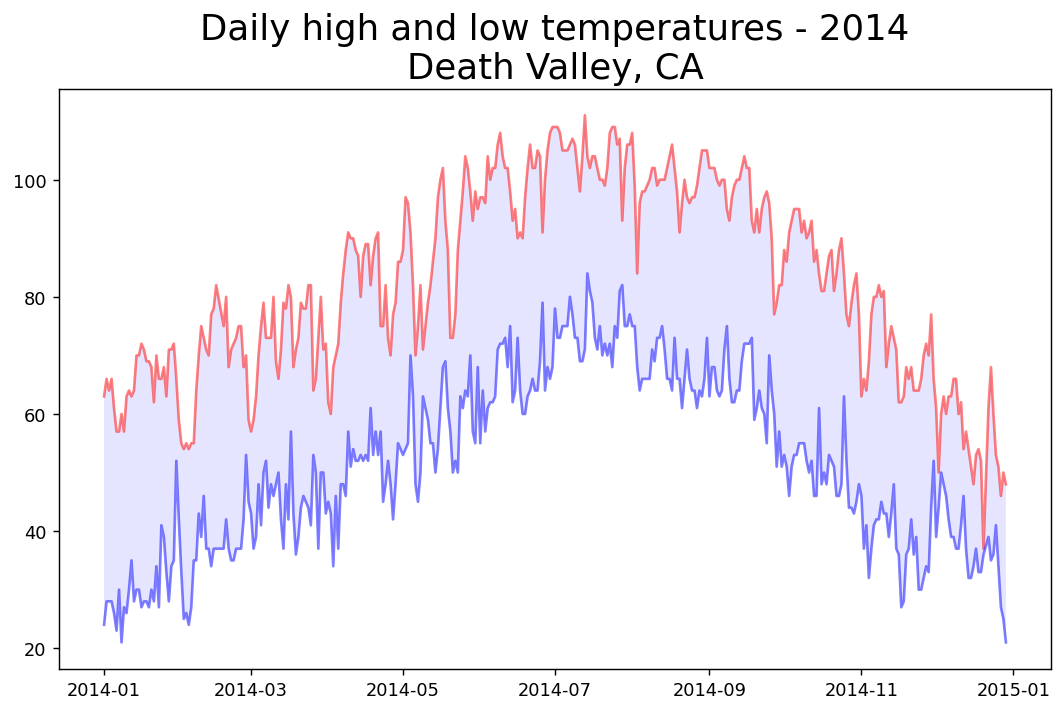

In [24]:
# 从文件中获取日期、 最高气温和最低气温
filename = 'death_valley_2014.csv'

with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, highs, lows = [], [], []

    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])
            low = int(row[3])
        except ValueError:
            print(current_date, 'missing data')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)

#根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

#设置图形的格式
title = "Daily high and low temperatures - 2014\nDeath Valley, CA"
plt.title(title, fontsize=20)

**现在运行highs_lows.py ， 将发现缺失数据的日期只有一个：**
```
2014-02-16 00:00:00 missing data
```